<a href="https://colab.research.google.com/github/sumanyurosha/tensorflow-specialization/blob/master/Practice/Emergency_Vehicle_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Solving Emergency Non-emergency Vehicle Classification Problem using Tensorflow. This problem was part of a AnalyticsVidya Janta Hackathon
You can find the problem [here](https://datahack.analyticsvidhya.com/contest/janatahack-computer-vision-hackathon/#ProblemStatement) 

# **1. Loading the Dataset**

In [1]:
# saving paths of dataset related files
train_csv = "/content/drive/My Drive/Resources/Datasets/janata-hackathon/train.csv"
base_dir = "/content/drive/My Drive/Resources/Datasets/janata-hackathon/images"


In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import time

In [3]:
df = pd.read_csv(train_csv)
df.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


# **2. Creating the Dataset**

In [4]:
def create_dataset(filepath):
    df = pd.read_csv(filepath)
    images = []
    labels = []

    for i in range(len(df)):
        image_path = os.path.join(base_dir, df["image_names"][i])
        image = keras.preprocessing.image.load_img(image_path)
        image = keras.preprocessing.image.img_to_array(image)
        images.append(image)
        labels.append(df["emergency_or_not"][i])

    return tf.data.Dataset.from_tensor_slices((tf.constant(images), tf.constant(labels)))

In [5]:
dataset = create_dataset(train_csv)

# **3. Visualizing the Images in the Dataset**

In [6]:
 import matplotlib.pyplot as plt
 import matplotlib.image as mpimg

n_rows = 4
n_cols = 4

In [7]:
x = dataset.take(1)
x

<TakeDataset shapes: ((224, 224, 3), ()), types: (tf.float32, tf.int32)>

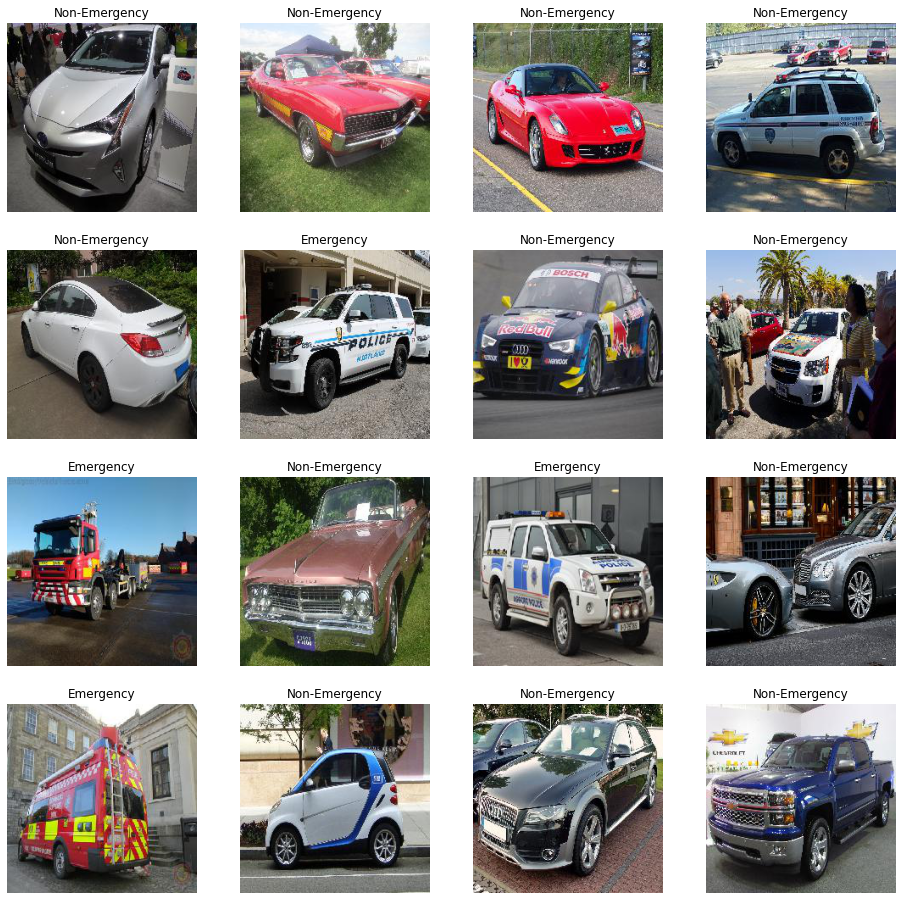

In [8]:
fig = plt.gcf()
fig.set_size_inches(n_rows*4, n_cols*4)

classes = ["Non-Emergency", "Emergency"]

for i, (image, label) in enumerate(dataset.take(16)):
    image = image.numpy()
    image = image/255.
    sp = plt.subplot(n_rows, n_cols, i+1)
    sp.axis("off")
    sp.title.set_text(classes[label])

    plt.imshow(image)

plt.show()
    

# **4. Creating a Model from Scratch**

In [9]:
model = keras.models.Sequential([
    keras.layers.Lambda(lambda x: x/255., input_shape=[224, 224, 3]),
    keras.layers.Conv2D(16, (3,3), activation="relu"),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0

In [10]:
dataset = dataset.shuffle(500).batch(32).prefetch(1)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


history = model.fit(dataset, epochs=15, verbose=1)

Epoch 1/15
52/52 [==============================] - 2s 31ms/step - loss: 0.7678 - accuracy: 0.6033
Epoch 2/15
52/52 [==============================] - 2s 31ms/step - loss: 0.5376 - accuracy: 0.7375
Epoch 3/15
52/52 [==============================] - 2s 32ms/step - loss: 0.4682 - accuracy: 0.7837
Epoch 4/15
52/52 [==============================] - 2s 31ms/step - loss: 0.4165 - accuracy: 0.8104
Epoch 5/15
52/52 [==============================] - 2s 31ms/step - loss: 0.3650 - accuracy: 0.8439
Epoch 6/15
52/52 [==============================] - 2s 31ms/step - loss: 0.3009 - accuracy: 0.8694
Epoch 7/15
52/52 [==============================] - 2s 31ms/step - loss: 0.2554 - accuracy: 0.8906
Epoch 8/15
52/52 [==============================] - 2s 31ms/step - loss: 0.2339 - accuracy: 0.9083
Epoch 9/15
52/52 [==============================] - 2s 32ms/step - loss: 0.1539 - accuracy: 0.9429
Epoch 10/15
52/52 [==============================] - 2s 31ms/step - loss: 0.1322 - accuracy: 0.9538
Epoch 11/